In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import random
import time
import seaborn as sns

# Python wrapper for Riot Games API
import riotwatcher as rw

In [2]:
lolNA = pd.read_csv("naMatchData5.csv")
lolEU = pd.read_csv("euMatchData3.csv")
lolKR = pd.read_csv("krMatchData2.csv")

In [3]:
lolNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   matchID        10050 non-null  object 
 1   matchDuration  10050 non-null  int64  
 2   win            10050 non-null  bool   
 3   champID        10050 non-null  int64  
 4   champName      10050 non-null  object 
 5   position       10050 non-null  object 
 6   lane           10050 non-null  object 
 7   role           10050 non-null  object 
 8   side           10050 non-null  object 
 9   dragons        10050 non-null  int64  
 10  heralds        10050 non-null  int64  
 11  barons         10050 non-null  int64  
 12  towers         10050 non-null  int64  
 13  kills          10050 non-null  int64  
 14  deaths         10050 non-null  int64  
 15  assists        10050 non-null  int64  
 16  vision         10050 non-null  int64  
 17  gold           10050 non-null  int64  
 18  level 

In [4]:
lolEU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   matchID        3462 non-null   object
 1   matchDuration  3462 non-null   int64 
 2   win            3462 non-null   bool  
 3   champID        3462 non-null   int64 
 4   champName      3462 non-null   object
 5   position       3462 non-null   object
 6   lane           3462 non-null   object
 7   role           3462 non-null   object
 8   side           3462 non-null   object
 9   dragons        3462 non-null   int64 
 10  heralds        3462 non-null   int64 
 11  barons         3462 non-null   int64 
 12  towers         3462 non-null   int64 
 13  kills          3462 non-null   int64 
 14  deaths         3462 non-null   int64 
 15  assists        3462 non-null   int64 
 16  vision         3462 non-null   int64 
 17  gold           3462 non-null   int64 
 18  level          3462 non-null

In [5]:
lolKR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   matchID        3420 non-null   object
 1   matchDuration  3420 non-null   int64 
 2   win            3420 non-null   bool  
 3   champID        3420 non-null   int64 
 4   champName      3420 non-null   object
 5   position       3420 non-null   object
 6   lane           3420 non-null   object
 7   role           3420 non-null   object
 8   side           3420 non-null   object
 9   dragons        3420 non-null   int64 
 10  heralds        3420 non-null   int64 
 11  barons         3420 non-null   int64 
 12  towers         3420 non-null   int64 
 13  kills          3420 non-null   int64 
 14  deaths         3420 non-null   int64 
 15  assists        3420 non-null   int64 
 16  vision         3420 non-null   int64 
 17  gold           3420 non-null   int64 
 18  level          3420 non-null

In [6]:
lol = pd.concat([lolNA, lolEU, lolKR])

In [7]:
lol

,matchID,matchDuration,win,champID,champName,position,lane,role,side,dragons,...,takenDamage,oppGold,oppLevel,oppMinions,gold@10,level@10,minions@10,oppGold@10,oppLevel@10,oppMinions@10
0,NA1_4390374823,1451,True,120,Hecarim,JUNGLE,JUNGLE,NONE,Red,2,...,37194,9087,12,41,4808.0,8.0,77.0,4099.0,7.0,57.0
1,NA1_4399960253,1422,False,254,Vi,JUNGLE,JUNGLE,NONE,Blue,1,...,24856,13394,15,16,3223.0,7.0,56.0,5334.0,8.0,71.0
2,NA1_4415371494,1565,False,555,Pyke,UTILITY,BOTTOM,SUPPORT,Red,1,...,14099,7223,11,33,2160.0,6.0,14.0,2475.0,5.0,15.0
3,NA1_4373606571,1678,False,80,Pantheon,TOP,TOP,SOLO,Blue,2,...,24382,15502,17,227,3550.0,8.0,65.0,3957.0,9.0,91.0
4,NA1_4406865056,1732,True,266,Aatrox,TOP,TOP,SOLO,Red,1,...,24817,11780,15,192,3748.0,9.0,74.0,4017.0,8.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,KR_5981247632,1900,False,24,Jax,TOP,TOP,SOLO,Red,1,...,30525,16581,17,241,3484.0,8.0,63.0,4374.0,8.0,81.0
3416,KR_5905937397,2016,False,119,Draven,TOP,TOP,DUO,Red,3,...,34520,12652,16,194,5940.0,9.0,74.0,4103.0,7.0,68.0
3417,KR_5413039454,1746818,True,223,TahmKench,UTILITY,BOTTOM,SUPPORT,Red,3,...,27988,7178,12,32,2559.0,6.0,20.0,2892.0,7.0,19.0
3418,KR_5799004550,1359,True,131,Diana,JUNGLE,JUNGLE,NONE,Blue,2,...,11414,8248,12,36,4517.0,8.0,65.0,3380.0,7.0,67.0


## The Game Plan

The basic idea seems fine. But, as a general note, a data analysis project must include a variety of forms of analysis including basic exploratory analysis of the variables, unsupervised methods (e.g., clustering and PCA) to supervised methods (classification and regression). For supervised approaches, you should employ a variety of predictive modeling techniques, try to optimize their parameters (similar to recent examples in class) and compare their performance in your evaluation. For classification (and also regression), I suggest, in addition to basic approaches such as decision trees, KNN, and Naive Bayes, to also try at least one ensemble method such as Random Forest or AdaBoost (we will be discussing these in the next couple of weeks, but you can read ahead). In the case of regression, you should try different types of regularization.

1. Cleaning (removing invalid roles, maybe adding towers taken data, removing rows with no data@10?)
2. Basic visualization, correlation, distributions of variables
3. Preprocessing - scaling, create KDA column, find epic monster damage (obj - turret), maybe convert 10 minute stats to ordinal scale (major disadvantage, minor disadvantage, even, minor advantage, major advantage)
4. K-Means clustering
5. Classification - KNN, Random Forest, AdaBoost
6. Regression - with Lasso and Ridge regularization

### Step 1

It's beyond the scope of this analysis to handle off-role, off-meta picks such as support Kayn. I wish I didn't have to ditch that many rows, but it's necessary.

Similarly, not sure there's a lot to learn from games that end before we can retrieve 10 minute statistics. These games are quite rare anyway.

Would be nice to add tower data--will rerun data collection overnight, and maybe that'll be good. Otherwise we'll proceed with the stripped down data.

In [8]:
# Rename columns with @ character
lol = lol.rename(columns={
    "gold@10": "goldAt10", 
    "level@10" : "levelAt10", 
    "minions@10" : "minionsAt10", 
    "oppGold@10" : "oppGoldAt10",
    "oppLevel@10" : "oppLevelAt10",
    "oppMinions@10" : "oppMinionsAt10"})

In [9]:
# Remove null goldAt10 rows
lol = lol[lol.goldAt10.notnull()]

In [10]:
# Remove invalid position rows
lol = lol[lol.position != 'Invalid']

In [11]:
# Fix 6-digit match durations, which appear to be in milliseconds
lol['matchDuration'] = (lol['matchDuration'] / 1000).where(lol['matchDuration'] > 99999, other=lol['matchDuration'])

In [12]:
lol

,matchID,matchDuration,win,champID,champName,position,lane,role,side,dragons,...,takenDamage,oppGold,oppLevel,oppMinions,goldAt10,levelAt10,minionsAt10,oppGoldAt10,oppLevelAt10,oppMinionsAt10
0,NA1_4390374823,1451.000,True,120,Hecarim,JUNGLE,JUNGLE,NONE,Red,2,...,37194,9087,12,41,4808.0,8.0,77.0,4099.0,7.0,57.0
1,NA1_4399960253,1422.000,False,254,Vi,JUNGLE,JUNGLE,NONE,Blue,1,...,24856,13394,15,16,3223.0,7.0,56.0,5334.0,8.0,71.0
2,NA1_4415371494,1565.000,False,555,Pyke,UTILITY,BOTTOM,SUPPORT,Red,1,...,14099,7223,11,33,2160.0,6.0,14.0,2475.0,5.0,15.0
3,NA1_4373606571,1678.000,False,80,Pantheon,TOP,TOP,SOLO,Blue,2,...,24382,15502,17,227,3550.0,8.0,65.0,3957.0,9.0,91.0
4,NA1_4406865056,1732.000,True,266,Aatrox,TOP,TOP,SOLO,Red,1,...,24817,11780,15,192,3748.0,9.0,74.0,4017.0,8.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,KR_5981247632,1900.000,False,24,Jax,TOP,TOP,SOLO,Red,1,...,30525,16581,17,241,3484.0,8.0,63.0,4374.0,8.0,81.0
3416,KR_5905937397,2016.000,False,119,Draven,TOP,TOP,DUO,Red,3,...,34520,12652,16,194,5940.0,9.0,74.0,4103.0,7.0,68.0
3417,KR_5413039454,1746.818,True,223,TahmKench,UTILITY,BOTTOM,SUPPORT,Red,3,...,27988,7178,12,32,2559.0,6.0,20.0,2892.0,7.0,19.0
3418,KR_5799004550,1359.000,True,131,Diana,JUNGLE,JUNGLE,NONE,Blue,2,...,11414,8248,12,36,4517.0,8.0,65.0,3380.0,7.0,67.0


### Step 2

Basic viz, correlation, and other exploratory data analysis

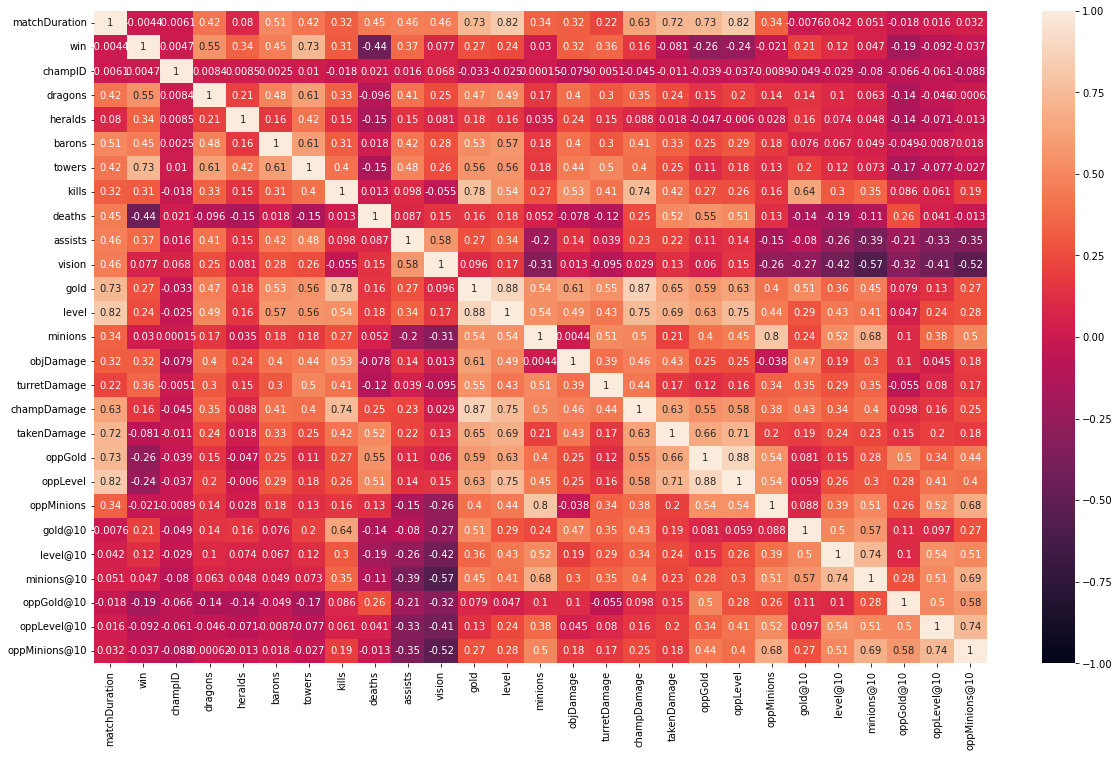

In [109]:
plt.figure(figsize=(20, 12))

heatmap = sns.heatmap(lolNA.corr(), vmin=-1, vmax=1, annot=True);

* Match Duration > barons, dragons, vision score = longer match?
* Match Duration > high gold/level @ 10 minutes = shorter match? minions less correlated since gated by time anyway
* Vision > gold/level@10 negatively correlated--look, supports exist!
* Gold highly correlated with kills, champion damage, and level--makes sense; things that get you gold also usually garner exp
* Gold/Level@10 highly correlated with each other and with oppGold/Level@10--makes sense intuitively
* Nothing particularly unexpected here

(array([  44.,  881., 1309., 2585., 2471., 1760.,  687.,  239.,   50.,
          24.]),
 array([ 497. ,  751.1, 1005.2, 1259.3, 1513.4, 1767.5, 2021.6, 2275.7,
        2529.8, 2783.9, 3038. ]),
 <BarContainer object of 10 artists>)

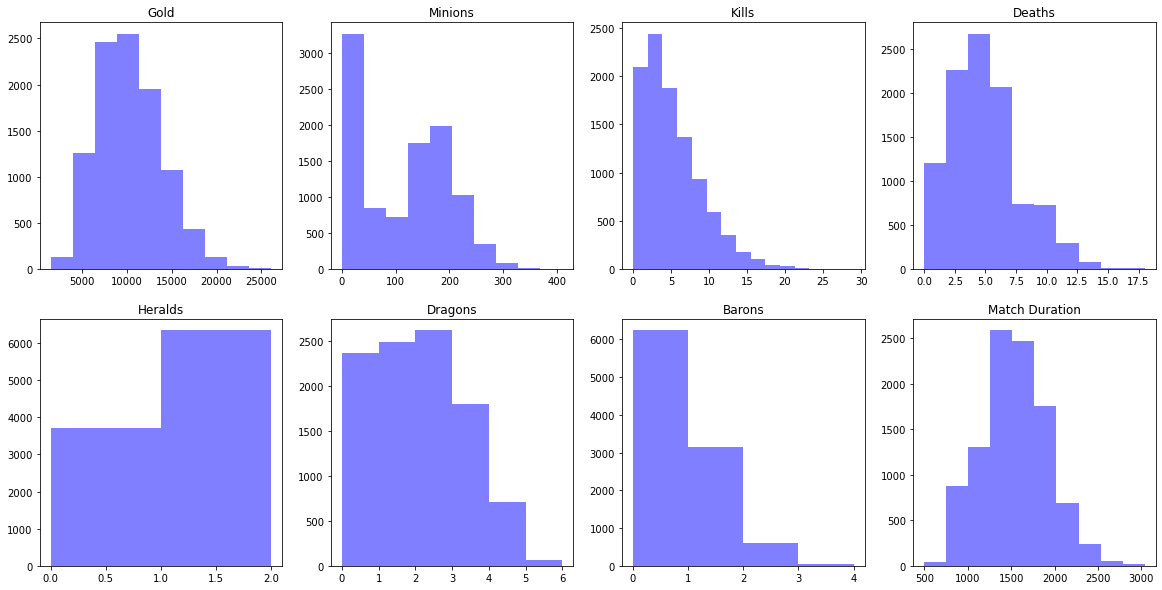

In [112]:
# Distribution Comparisons
fig1 = plt.figure(figsize=(20,10))

# Gold
ax1 = fig1.add_subplot(241)
plt.title("Gold")
plt.hist(lolNA['gold'], 
         alpha=0.5, 
         color="blue",
         bins=10)

# Minions
ax1 = fig1.add_subplot(242)
plt.title("Minions")
plt.hist(lolNA['minions'], 
         alpha=0.5, 
         color="blue")

# Kills
ax1 = fig1.add_subplot(243)
plt.title("Kills")
plt.hist(lolNA['kills'], 
         alpha=0.5, 
         color="blue",
         bins=15)

# Deaths
ax1 = fig1.add_subplot(244)
plt.title("Deaths")
plt.hist(lolNA['deaths'], 
         alpha=0.5, 
         color="blue")

# Heralds
ax1 = fig1.add_subplot(245)
plt.title("Heralds")
plt.hist(lolNA['heralds'], 
         alpha=0.5, 
         color="blue",
         bins=2)

# Dragons
ax1 = fig1.add_subplot(246)
plt.title("Dragons")
plt.hist(lolNA['dragons'], 
         alpha=0.5, 
         color="blue",
         bins=6)

# Barons
ax1 = fig1.add_subplot(247)
plt.title("Barons")
plt.hist(lolNA['barons'], 
         alpha=0.5, 
         color="blue",
         bins=4)

# Match Duration
ax1 = fig1.add_subplot(248)
plt.title("Match Duration")
plt.hist(lolNA['matchDuration'], 
         alpha=0.5, 
         color="blue")



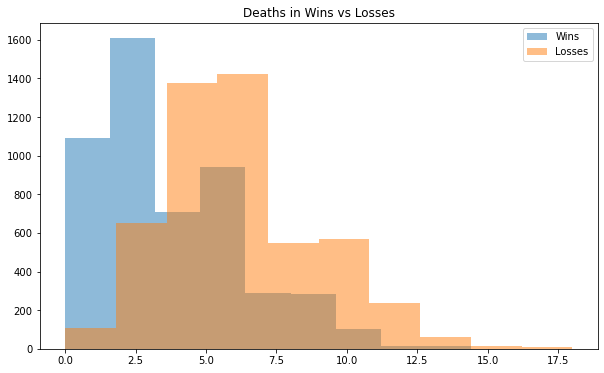

In [15]:
plt.figure(figsize=(10,6))
plt.title("Deaths in Wins vs Losses")
plt.hist(lolNA['deaths'].loc[lolNA['win'] == 1], bins=10, alpha=0.5, label="Wins")
plt.hist(lolNA['deaths'].loc[lolNA['win'] == 0], bins=10, alpha=0.5, label="Losses")
plt.legend()

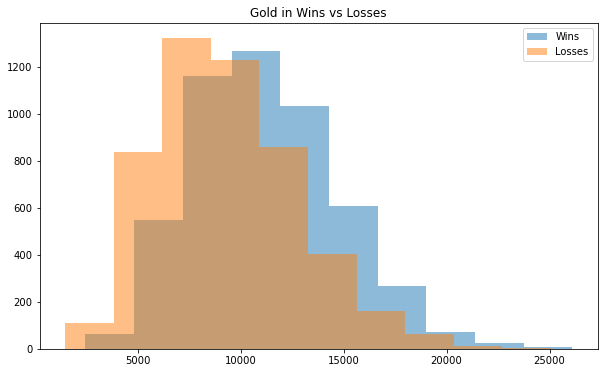

In [16]:
plt.figure(figsize=(10,6))
plt.title("Gold in Wins vs Losses")
plt.hist(lolNA['gold'].loc[lolNA['win'] == 1], bins=10, alpha=0.5, label="Wins")
plt.hist(lolNA['gold'].loc[lolNA['win'] == 0], bins=10, alpha=0.5, label="Losses")
plt.legend()

In [17]:
# Also want to do deaths, assists, maybe KDA? level for sure, and vision

### Step 3

Preprocessing - scaling, create KDA column, find epic monster damage (obj - turret), maybe convert 10 minute stats to ordinal scale (major disadvantage, minor disadvantage, even, minor advantage, major advantage)

In [18]:
lol['KDA'] = (lol.kills + lol.assists) / lol.deaths

In [19]:
lol['monsterDamage'] = lol.objDamage - lol.turretDamage

In [20]:
lol['advAt10'] = lol.goldAt10 - lol.oppGoldAt10

In [21]:
lol['advAt10'].describe()

count    16914.000000
mean        10.835580
std       1077.546817
min      -6557.000000
25%       -657.000000
50%         10.000000
75%        674.000000
max       4923.000000
Name: advAt10, dtype: float64

In [22]:
lol['csDiffAt10'] = lol.minionsAt10 - lol.oppMinionsAt10

In [23]:
lol['lvlDiffAt10'] = lol.levelAt10 - lol.oppLevelAt10

In [24]:
lol['side'] = np.where(lol['side'] == 'Red', 0, 1)

In [25]:
lol

,matchID,matchDuration,win,champID,champName,position,lane,role,side,dragons,...,levelAt10,minionsAt10,oppGoldAt10,oppLevelAt10,oppMinionsAt10,KDA,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
0,NA1_4390374823,1451.000,True,120,Hecarim,JUNGLE,JUNGLE,NONE,0,2,...,8.0,77.0,4099.0,7.0,57.0,4.600000,17804,709.0,20.0,1.0
1,NA1_4399960253,1422.000,False,254,Vi,JUNGLE,JUNGLE,NONE,1,1,...,7.0,56.0,5334.0,8.0,71.0,0.666667,4437,-2111.0,-15.0,-1.0
2,NA1_4415371494,1565.000,False,555,Pyke,UTILITY,BOTTOM,SUPPORT,0,1,...,6.0,14.0,2475.0,5.0,15.0,0.666667,255,-315.0,-1.0,1.0
3,NA1_4373606571,1678.000,False,80,Pantheon,TOP,TOP,SOLO,1,2,...,8.0,65.0,3957.0,9.0,91.0,1.833333,0,-407.0,-26.0,-1.0
4,NA1_4406865056,1732.000,True,266,Aatrox,TOP,TOP,SOLO,0,1,...,9.0,74.0,4017.0,8.0,64.0,1.500000,5897,-269.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,KR_5981247632,1900.000,False,24,Jax,TOP,TOP,SOLO,0,1,...,8.0,63.0,4374.0,8.0,81.0,1.285714,7109,-890.0,-18.0,0.0
3416,KR_5905937397,2016.000,False,119,Draven,TOP,TOP,DUO,0,3,...,9.0,74.0,4103.0,7.0,68.0,1.500000,10500,1837.0,6.0,2.0
3417,KR_5413039454,1746.818,True,223,TahmKench,UTILITY,BOTTOM,SUPPORT,0,3,...,6.0,20.0,2892.0,7.0,19.0,0.571429,71,-333.0,1.0,-1.0
3418,KR_5799004550,1359.000,True,131,Diana,JUNGLE,JUNGLE,NONE,1,2,...,8.0,65.0,3380.0,7.0,67.0,13.000000,29865,1137.0,-2.0,1.0


0-300: even 

300-600: minor

600+: major

### Step 4

KMeans clustering. 

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import completeness_score, homogeneity_score

In [27]:
lolNums = lol.loc[:, ~lol.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

In [28]:
lolNums

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
0,1451.000,True,0,2,0,1,4,9,5,14,...,688,22716,37194,9087,12,41,17804,709.0,20.0,1.0
1,1422.000,False,1,1,0,0,1,2,12,6,...,1294,8098,24856,13394,15,16,4437,-2111.0,-15.0,-1.0
2,1565.000,False,0,1,0,0,1,2,6,2,...,0,2582,14099,7223,11,33,255,-315.0,-1.0,1.0
3,1678.000,False,1,2,1,0,2,6,6,5,...,0,20798,24382,15502,17,227,0,-407.0,-26.0,-1.0
4,1732.000,True,0,1,1,1,7,5,6,4,...,3528,19831,24817,11780,15,192,5897,-269.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,1900.000,False,0,1,2,0,4,5,7,4,...,1503,21271,30525,16581,17,241,7109,-890.0,-18.0,0.0
3416,2016.000,False,0,3,0,0,5,12,12,6,...,7855,41513,34520,12652,16,194,10500,1837.0,6.0,2.0
3417,1746.818,True,0,3,0,1,10,1,7,3,...,1537,6106,27988,7178,12,32,71,-333.0,1.0,-1.0
3418,1359.000,True,1,2,2,0,9,2,1,11,...,4654,8526,11414,8248,12,36,29865,1137.0,-2.0,1.0


In [29]:
kmeans = KMeans(n_clusters=5, random_state=14).fit(lolNums)
clusters = kmeans.predict(lolNums)

In [30]:
sils = metrics.silhouette_samples(lolNums, clusters)
sils.mean()

0.25975006107276727

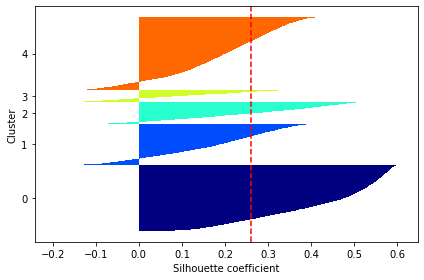

In [31]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

plot_silhouettes(lolNums, clusters)

In [32]:
def kmeansTester(kList, data, randomState=14):
    for k in kList:
        kmeans = KMeans(n_clusters=k, random_state=randomState).fit(data)
        clusters = kmeans.predict(data)
        
        sils = metrics.silhouette_samples(data, clusters)
        print(f"Silhouette Mean for k = {k}: {sils.mean()}")
        
        plot_silhouettes(data, clusters)

Silhouette Mean for k = 2: 0.4054042749979288


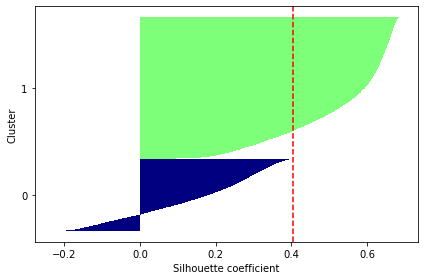

Silhouette Mean for k = 3: 0.37384531866614673


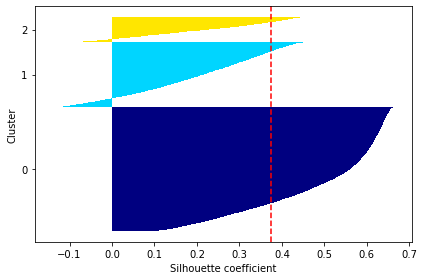

Silhouette Mean for k = 4: 0.31332794961375277


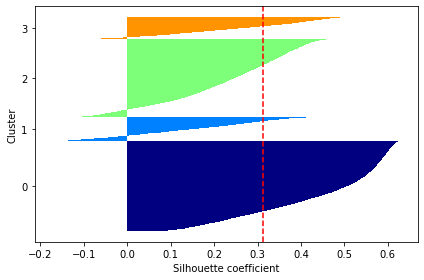

Silhouette Mean for k = 5: 0.25975006107276727


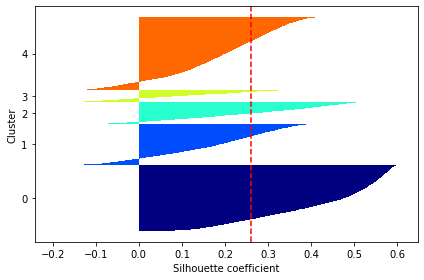

Silhouette Mean for k = 6: 0.26032367771770637


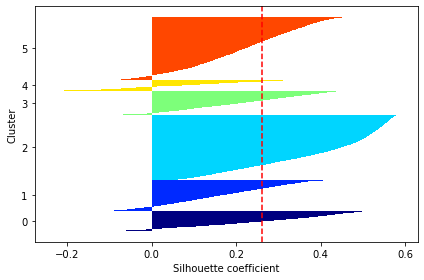

Silhouette Mean for k = 7: 0.26273095485284875


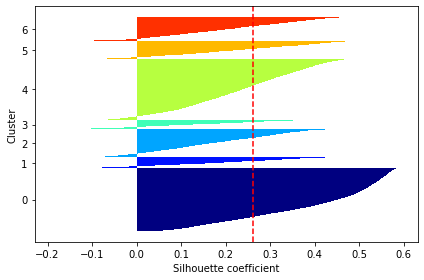

Silhouette Mean for k = 8: 0.2514540670065408


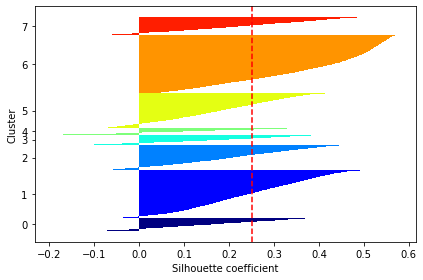

Silhouette Mean for k = 9: 0.23238580567997355


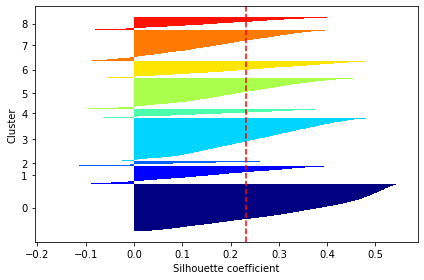

Silhouette Mean for k = 10: 0.22644956065617838


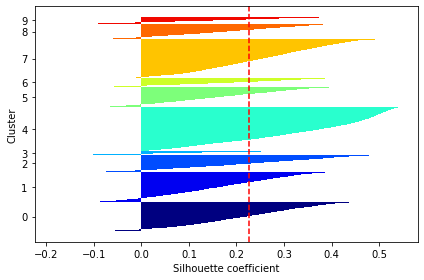

In [33]:
kList = list(range(2,11))

kmeansTester(kList, lolNums)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
lolPCA = pca.fit(lolNums)
var = lolPCA.explained_variance_ratio_*100

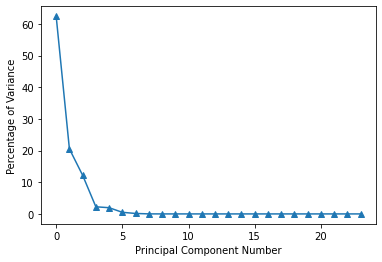

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(24), var[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [39]:
pca3 = PCA(n_components=3)
lolSmall = pca3.fit(lolNums)

In [40]:
lolSmall.components_

array([[ 1.90394746e-02,  3.52416021e-06,  5.52314378e-08,
         3.38531538e-05,  4.45203296e-06,  1.80675697e-05,
         9.31695954e-05,  1.95877665e-04,  7.56754445e-05,
         1.01583830e-04,  1.24552869e-04,  2.11942613e-01,
         1.39326055e-04,  1.55848799e-03,  6.60577669e-02,
         5.89640154e-01,  6.23451788e-01,  1.60133364e-01,
         1.18026068e-04,  1.27887667e-03,  4.33801531e-01,
         1.24850809e-02,  1.94633696e-04,  8.44527681e-06],
       [-1.16854916e-02,  1.28685795e-05, -1.19230111e-06,
         1.65295502e-05,  1.68988294e-05,  5.60248276e-06,
         3.76060046e-05, -1.82679035e-05, -1.30690969e-04,
        -2.99528136e-05, -3.23509905e-05, -4.78507021e-02,
        -5.01758870e-05, -4.11169519e-03, -4.57290690e-02,
        -3.53226190e-01, -2.40030979e-01, -1.07272069e-01,
        -8.79911975e-05, -3.65660338e-03,  8.95217959e-01,
         1.20911641e-02,  5.90413741e-05,  3.23556945e-06],
       [-7.07225943e-03,  2.60983712e-05,  5.17344882e

In [41]:
pcaKmeans = KMeans(n_clusters=3, random_state=17).fit(lolSmall.components_)
pcaClusters = kmeans.predict(lolSmall.components_)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [42]:
# pcaSils = metrics.silhouette_samples(lolSmall.components_, pcaClusters)
# print(f"Silhouette Mean for k = {k}: {pcaSils.mean()}")

# https://stackoverflow.com/questions/51382250/valueerror-number-of-labels-is-1-valid-values-are-2-to-n-samples-1-inclusiv


### Step 5 - KNN

Classification - KNN, Random Forest, AdaBoost

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [44]:
lolNums

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
0,1451.000,True,0,2,0,1,4,9,5,14,...,688,22716,37194,9087,12,41,17804,709.0,20.0,1.0
1,1422.000,False,1,1,0,0,1,2,12,6,...,1294,8098,24856,13394,15,16,4437,-2111.0,-15.0,-1.0
2,1565.000,False,0,1,0,0,1,2,6,2,...,0,2582,14099,7223,11,33,255,-315.0,-1.0,1.0
3,1678.000,False,1,2,1,0,2,6,6,5,...,0,20798,24382,15502,17,227,0,-407.0,-26.0,-1.0
4,1732.000,True,0,1,1,1,7,5,6,4,...,3528,19831,24817,11780,15,192,5897,-269.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,1900.000,False,0,1,2,0,4,5,7,4,...,1503,21271,30525,16581,17,241,7109,-890.0,-18.0,0.0
3416,2016.000,False,0,3,0,0,5,12,12,6,...,7855,41513,34520,12652,16,194,10500,1837.0,6.0,2.0
3417,1746.818,True,0,3,0,1,10,1,7,3,...,1537,6106,27988,7178,12,32,71,-333.0,1.0,-1.0
3418,1359.000,True,1,2,2,0,9,2,1,11,...,4654,8526,11414,8248,12,36,29865,1137.0,-2.0,1.0


In [45]:
# separate target
lolTarget = lolNums.win

# split data into training and test sets
lolTrain, lolTest, lolTargetTrain, lolTargetTest = train_test_split(
    lolNums.loc[:, lolNums.columns!='win'], 
    lolTarget, 
    test_size=0.2, 
    random_state=111)

print(lolTrain.shape)
lolTrain.head()

(13531, 23)


,matchDuration,side,dragons,heralds,barons,towers,kills,deaths,assists,vision,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
422,1609.000,1,0,0,0,2,3,8,2,14,...,4503,7695,16385,14216,16,166,278,-1262.0,-33.0,-2.0
2181,1771.000,0,4,1,1,9,8,4,11,19,...,1894,23583,16113,12261,16,252,7794,-518.0,-21.0,-1.0
767,2249.000,1,4,1,1,10,5,10,26,38,...,542,31428,51744,16611,18,203,292,-355.0,-12.0,-1.0
3006,942.000,1,1,0,0,2,9,4,5,7,...,1585,12102,8988,6224,8,86,1348,351.0,16.0,1.0
1907,1783.257,0,3,1,2,7,4,3,18,17,...,2382,12467,21297,12858,16,214,8587,-1434.0,-28.0,-1.0


In [46]:
# Create scaler
minmax = preprocessing.MinMaxScaler().fit(lolTrain)

# normalize train set and convert to dataframe
lolTrainNorm = minmax.transform(lolTrain)
lolTrainNorm = pd.DataFrame(lolTrainNorm, columns=lolTrain.columns, index=lolTrain.index)

# normalize test set and convert to dataframe
lolTestNorm = minmax.transform(lolTest)
lolTestNorm = pd.DataFrame(lolTestNorm, columns=lolTest.columns, index=lolTest.index)

In [47]:
# create classifier with k=10 and fit model on train data
knnClass = KNeighborsClassifier(10)
knnClass.fit(lolTrainNorm, lolTargetTrain)

# predict with train data
knnPredTrain = knnClass.predict(lolTrainNorm)

# predict with test data
knnPredTest = knnClass.predict(lolTestNorm)

In [48]:
# create train classification report
print(classification_report(lolTargetTrain, knnPredTrain))

# create test classification report
print(classification_report(lolTargetTest, knnPredTest))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      6757
        True       0.96      0.96      0.96      6774

    accuracy                           0.96     13531
   macro avg       0.96      0.96      0.96     13531
weighted avg       0.96      0.96      0.96     13531

              precision    recall  f1-score   support

       False       0.95      0.96      0.95      1670
        True       0.96      0.95      0.96      1713

    accuracy                           0.95      3383
   macro avg       0.95      0.95      0.95      3383
weighted avg       0.95      0.95      0.95      3383



<AxesSubplot:>

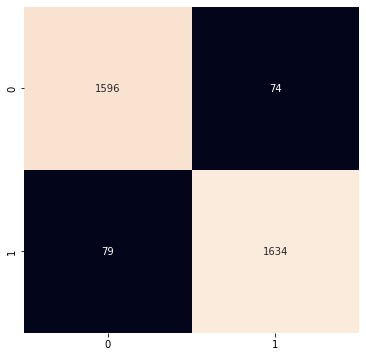

In [49]:
# Generate confusion matrix
cm = confusion_matrix(lolTargetTest, knnPredTest)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')

In [50]:
knnAccs = []
knnAccsDist = []
kList = range(5, 101, 5)

for val in kList:
    # fit with no weight
    knnclf = KNeighborsClassifier(val)
    knnclf.fit(lolTrainNorm, lolTargetTrain)
    
    # append accuracy to list
    knnAccs.append(knnclf.score(lolTestNorm, lolTargetTest))
    
    # fit with weight
    knnclfWeight = KNeighborsClassifier(val, weights='distance')
    knnclfWeight.fit(lolTrainNorm, lolTargetTrain)
    
    # append accuracy to list
    knnAccsDist.append(knnclfWeight.score(lolTestNorm, lolTargetTest))

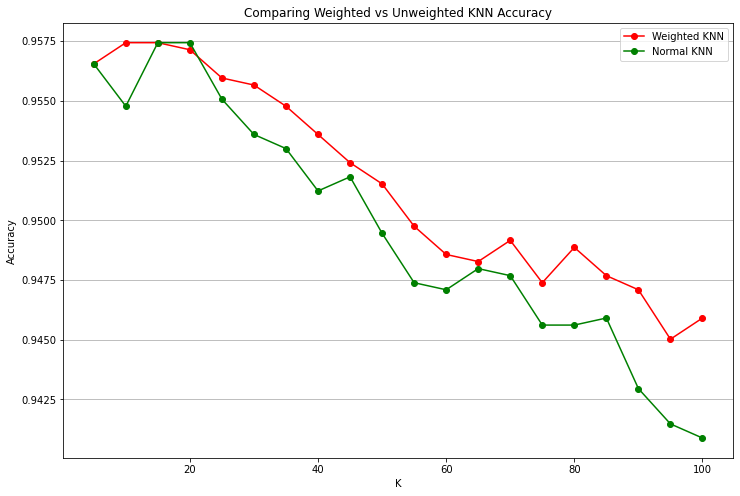

In [51]:
# plot accuracy
plt.figure(figsize=(12,8))
plt.plot(kList, knnAccsDist, 'ro-', label="Weighted KNN")
plt.plot(kList, knnAccs, 'go-', label="Normal KNN")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Comparing Weighted vs Unweighted KNN Accuracy')
plt.legend()
plt.grid(axis="y")
plt.show()

In [52]:
trainAccs = []

# get accuracies for training data
for val in kList:
    knnclf = KNeighborsClassifier(val, weights='distance')
    knnclf.fit(lolTrainNorm, lolTargetTrain)

    trainAccs.append(knnclf.score(lolTrainNorm, lolTargetTrain))

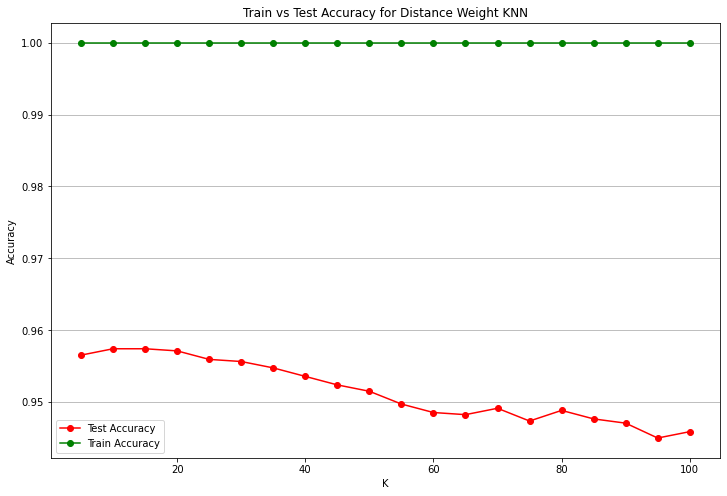

In [53]:
# plot accuracy
plt.figure(figsize=(12,8))
plt.plot(kList, knnAccsDist, 'ro-', label="Test Accuracy")
plt.plot(kList, trainAccs, 'go-', label="Train Accuracy")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Distance Weight KNN')
plt.legend()
plt.grid(axis="y")
plt.show()

Achieving really high test accuracy with k=20 using distance weight. No sign of overfitting, either. Wonder if I can rerun by position? By region?

It's nice that we can predict wins very well, but it'd be better to get actual feature importance.

In [105]:
selectedKnn = KNeighborsClassifier(15, weights='distance')
selectedKnn.fit(lolTrainNorm, lolTargetTrain)

# predict with train data
selectPredTrain = selectedKnn.predict(lolTrainNorm)

# predict with test data
selectPredTest = selectedKnn.predict(lolTestNorm)

# create train classification report
print(classification_report(lolTargetTrain, selectPredTrain))

# create test classification report
print(classification_report(lolTargetTest, selectPredTest))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6757
        True       1.00      1.00      1.00      6774

    accuracy                           1.00     13531
   macro avg       1.00      1.00      1.00     13531
weighted avg       1.00      1.00      1.00     13531

              precision    recall  f1-score   support

       False       0.96      0.95      0.96      1670
        True       0.95      0.96      0.96      1713

    accuracy                           0.96      3383
   macro avg       0.96      0.96      0.96      3383
weighted avg       0.96      0.96      0.96      3383



Do I want to do a ROC evaluation, too? I think that'd be nice.

### Step 5 - Random Forest

In [55]:
# Create and fit classifier
rfclf = RandomForestClassifier()
rfclf.fit(lolTrain, lolTargetTrain)

# Run predictions on training and validation sets
rfPredTrain = rfclf.predict(lolTrain)
rfPredTest = rfclf.predict(lolTest)

# create train classification report
print(classification_report(lolTargetTrain, rfPredTrain))

# create test classification report
print(classification_report(lolTargetTest, rfPredTest))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6757
        True       1.00      1.00      1.00      6774

    accuracy                           1.00     13531
   macro avg       1.00      1.00      1.00     13531
weighted avg       1.00      1.00      1.00     13531

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1670
        True       0.96      0.96      0.96      1713

    accuracy                           0.96      3383
   macro avg       0.96      0.96      0.96      3383
weighted avg       0.96      0.96      0.96      3383



<AxesSubplot:>

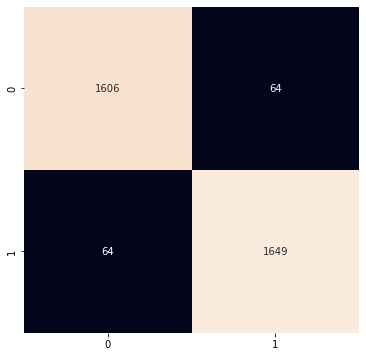

In [56]:
# Generate confusion matrix
cm = confusion_matrix(lolTargetTest, rfPredTest)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')

In [57]:
# Hyperparameter random search
randomGrid = {'n_estimators': list(range(200, 2001, 200)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,111,10)),
               'min_samples_split': [2, 5, 10, 25],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [58]:
rfRandom = RandomizedSearchCV(estimator = rfclf, param_distributions = randomGrid, n_iter = 100, cv = 4, verbose=2, random_state=14, n_jobs = -1)
rfRandom.fit(lolTrain, lolTargetTrain)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 25],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=14, verbose=2)

In [59]:
rfRandom.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [60]:
rfRandClf = RandomForestClassifier(
    n_estimators=600, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    max_features='auto',
    max_depth=70,
    bootstrap=False)

rfRandClf.fit(lolTrain, lolTargetTrain)

# Run predictions on training and validation sets
rfRandTrain = rfclf.predict(lolTrain)
rfRandTest = rfclf.predict(lolTest)

# create train classification report
print(classification_report(lolTargetTrain, rfRandTrain))

# create test classification report
print(classification_report(lolTargetTest, rfRandTest))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6757
        True       1.00      1.00      1.00      6774

    accuracy                           1.00     13531
   macro avg       1.00      1.00      1.00     13531
weighted avg       1.00      1.00      1.00     13531

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1670
        True       0.96      0.96      0.96      1713

    accuracy                           0.96      3383
   macro avg       0.96      0.96      0.96      3383
weighted avg       0.96      0.96      0.96      3383



In [61]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

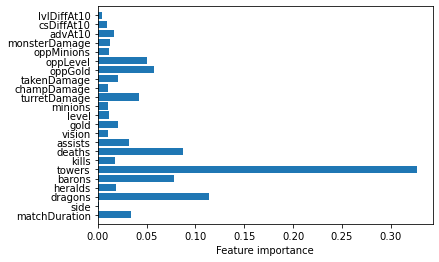

In [62]:
plot_feature_importances(rfRandClf.feature_importances_, df=lolTrain)

In [63]:
rfRandClf.feature_importances_.sort()

### Step 5 - AdaBoost

In [64]:
abclf = AdaBoostClassifier()

abclf.fit(lolTrain, lolTargetTrain)

# Run predictions on training and validation sets
abPredTrain = abclf.predict(lolTrain)
abPredTest = abclf.predict(lolTest)

# create train classification report
print(classification_report(lolTargetTrain, abPredTrain))

# create test classification report
print(classification_report(lolTargetTest, abPredTest))

              precision    recall  f1-score   support

       False       0.96      0.95      0.96      6757
        True       0.95      0.96      0.96      6774

    accuracy                           0.96     13531
   macro avg       0.96      0.96      0.96     13531
weighted avg       0.96      0.96      0.96     13531

              precision    recall  f1-score   support

       False       0.95      0.96      0.95      1670
        True       0.96      0.95      0.95      1713

    accuracy                           0.95      3383
   macro avg       0.95      0.95      0.95      3383
weighted avg       0.95      0.95      0.95      3383



<AxesSubplot:>

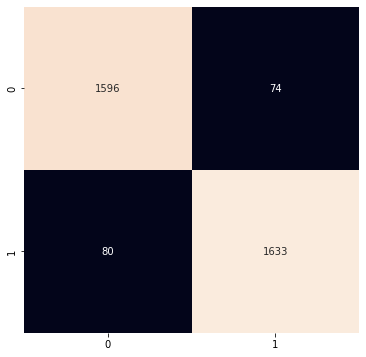

In [65]:
# Generate confusion matrix
cm = confusion_matrix(lolTargetTest, abPredTest)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')

In [66]:
# Create parameter dictionary
params = {"learning_rate" : [.001, .01, .1, .5, 1], "n_estimators" : [3, 5, 10, 15, 25, 50, 100]}

# Run grid search
cv = StratifiedKFold(n_splits=10, random_state=14, shuffle=True)
abGrid = GridSearchCV(estimator=abclf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1)

# Fit model
abGrid.fit(lolTrain, lolTargetTrain)

# Find best estimators
abBest = abGrid.best_estimator_
          
# show chosen hyperparameters
print(abGrid.best_params_)

# Make predictions
abPreds = abBest.predict(lolTest)

# Show metrics
print(metrics.classification_report(lolTargetTest, abPreds))

{'learning_rate': 0.5, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.95      0.96      0.96      1670
        True       0.96      0.96      0.96      1713

    accuracy                           0.96      3383
   macro avg       0.96      0.96      0.96      3383
weighted avg       0.96      0.96      0.96      3383



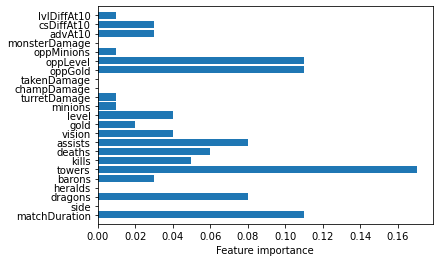

In [67]:
plot_feature_importances(abBest.feature_importances_, df=lolTrain)

### Step 6
Regression - logistic regression with Lasso and Ridge regularization

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [69]:
# Need to use normalized data--from knn?

In [70]:
logReg = LogisticRegression(random_state=14, max_iter=20000, C=50, n_jobs=-1)
logReg.fit(lolTrain, lolTargetTrain)

LogisticRegression(C=50, max_iter=20000, n_jobs=-1, random_state=14)

In [71]:
logRegF1 = cross_val_score(logReg, lolTrain, lolTargetTrain, scoring="f1",cv=cv, n_jobs=-1)
logRegROC = cross_val_score(logReg, lolTrain, lolTargetTrain, scoring="roc_auc", cv=cv, n_jobs=-1)

In [72]:
print('F1: %.3f (%.3f)' % (np.mean(logRegF1), np.std(logRegF1)))
print('ROC: %.3f (%.3f)' % (np.mean(logRegROC), np.std(logRegROC)))

F1: 0.959 (0.005)
ROC: 0.992 (0.002)


In [73]:
lrPreds = logReg.predict(lolTest)
print(metrics.classification_report(lolTargetTest, lrPreds))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1670
        True       0.97      0.96      0.96      1713

    accuracy                           0.96      3383
   macro avg       0.96      0.96      0.96      3383
weighted avg       0.96      0.96      0.96      3383



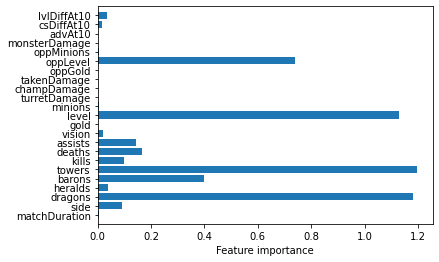

In [74]:
plot_feature_importances(abs(logReg.coef_[0]), df=lolTrain)

In [75]:
# Creating list of C values, as well as accumulators for training and testing accuracy
cList = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
trainAcc = []
testAcc = []

# For loop to iterate through C values
for val in cList:
    clf = LogisticRegression(max_iter = 20000, C=val) # Create model with value from C_list
    clf.fit(lolTrainNorm, lolTargetTrain)
    predTrain = clf.predict(lolTrainNorm)
    predTest = clf.predict(lolTestNorm)
    trainAcc.append((lolTargetTrain == predTrain).mean())
    testAcc.append((lolTargetTest == predTest).mean())

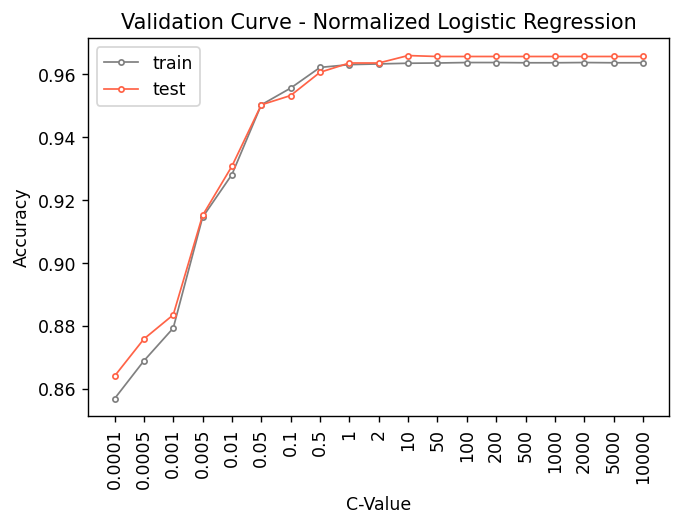

In [76]:
f, ax = plt.subplots(dpi=125)
plt.plot(trainAcc, marker='.', markerfacecolor='white', color='grey', label = 'train', linewidth=1)
plt.plot(testAcc, color='tomato', marker='.', markerfacecolor='white', label = 'test', linewidth=1)
plt.title('Validation Curve - Normalized Logistic Regression')
plt.xticks(ticks=np.arange(len(cList)), labels=cList, rotation=90)
plt.xlabel('C-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
elasticNet = [round(x * 0.05, 2) for x in range(0, 21)]

trainAcc = []
testAcc = []

# For loop to iterate through C values
for val in elasticNet:
    clf = LogisticRegression(max_iter = 20000, C=50, solver='saga', penalty='elasticnet', l1_ratio=val) 
    clf.fit(lolTrainNorm, lolTargetTrain)
    predTrain = clf.predict(lolTrainNorm)
    predTest = clf.predict(lolTestNorm)
    trainAcc.append((lolTargetTrain == predTrain).mean())
    testAcc.append((lolTargetTest == predTest).mean())

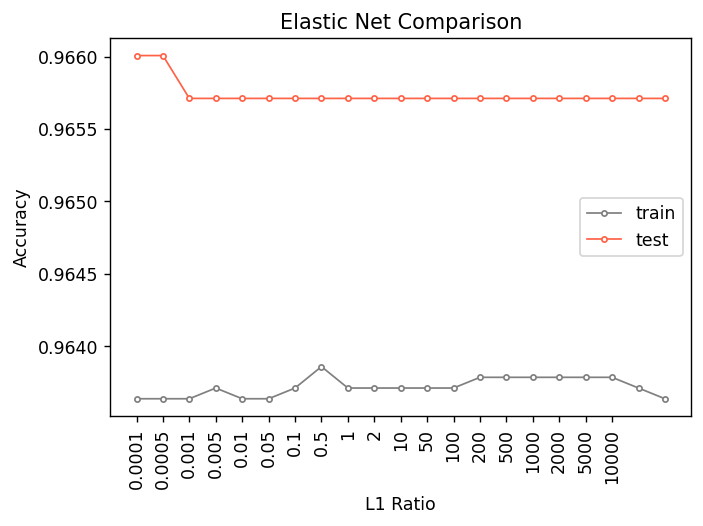

In [114]:
f, ax = plt.subplots(dpi=125)
plt.plot(trainAcc, marker='.', markerfacecolor='white', color='grey', label = 'train', linewidth=1)
plt.plot(testAcc, color='tomato', marker='.', markerfacecolor='white', label = 'test', linewidth=1)
plt.title('Elastic Net Comparison')
plt.xticks(ticks=np.arange(len(cList)), labels=cList, rotation=90)
plt.xlabel('L1 Ratio')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1670
        True       0.97      0.96      0.97      1713

    accuracy                           0.97      3383
   macro avg       0.97      0.97      0.97      3383
weighted avg       0.97      0.97      0.97      3383



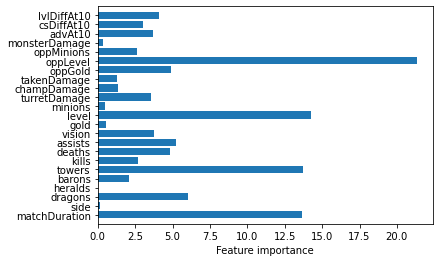

In [79]:
logRegFinal = LogisticRegression(max_iter = 20000, C=50) 
logRegFinal.fit(lolTrainNorm, lolTargetTrain)

lrPredsFinal = logRegFinal.predict(lolTestNorm)
print(metrics.classification_report(lolTargetTest, lrPredsFinal))

plot_feature_importances(abs(logRegFinal.coef_[0]), df=lolTestNorm)

### Step 7

Analyzing based on role

- split data into roles
- re-run best models based on role and examine how feature importance changes per role

In [80]:
lol

,matchID,matchDuration,win,champID,champName,position,lane,role,side,dragons,...,levelAt10,minionsAt10,oppGoldAt10,oppLevelAt10,oppMinionsAt10,KDA,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
0,NA1_4390374823,1451.000,True,120,Hecarim,JUNGLE,JUNGLE,NONE,0,2,...,8.0,77.0,4099.0,7.0,57.0,4.600000,17804,709.0,20.0,1.0
1,NA1_4399960253,1422.000,False,254,Vi,JUNGLE,JUNGLE,NONE,1,1,...,7.0,56.0,5334.0,8.0,71.0,0.666667,4437,-2111.0,-15.0,-1.0
2,NA1_4415371494,1565.000,False,555,Pyke,UTILITY,BOTTOM,SUPPORT,0,1,...,6.0,14.0,2475.0,5.0,15.0,0.666667,255,-315.0,-1.0,1.0
3,NA1_4373606571,1678.000,False,80,Pantheon,TOP,TOP,SOLO,1,2,...,8.0,65.0,3957.0,9.0,91.0,1.833333,0,-407.0,-26.0,-1.0
4,NA1_4406865056,1732.000,True,266,Aatrox,TOP,TOP,SOLO,0,1,...,9.0,74.0,4017.0,8.0,64.0,1.500000,5897,-269.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,KR_5981247632,1900.000,False,24,Jax,TOP,TOP,SOLO,0,1,...,8.0,63.0,4374.0,8.0,81.0,1.285714,7109,-890.0,-18.0,0.0
3416,KR_5905937397,2016.000,False,119,Draven,TOP,TOP,DUO,0,3,...,9.0,74.0,4103.0,7.0,68.0,1.500000,10500,1837.0,6.0,2.0
3417,KR_5413039454,1746.818,True,223,TahmKench,UTILITY,BOTTOM,SUPPORT,0,3,...,6.0,20.0,2892.0,7.0,19.0,0.571429,71,-333.0,1.0,-1.0
3418,KR_5799004550,1359.000,True,131,Diana,JUNGLE,JUNGLE,NONE,1,2,...,8.0,65.0,3380.0,7.0,67.0,13.000000,29865,1137.0,-2.0,1.0


In [81]:
lol1, lol2, lol3, lol4, lol5 = [x for _, x in lol.groupby(lol['position'])]

In [82]:
adc = lol1.loc[:, ~lol1.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

In [83]:
jng = lol2.loc[:, ~lol2.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

jng

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
0,1451.000,True,0,2,0,1,4,9,5,14,...,688,22716,37194,9087,12,41,17804,709.0,20.0,1.0
1,1422.000,False,1,1,0,0,1,2,12,6,...,1294,8098,24856,13394,15,16,4437,-2111.0,-15.0,-1.0
14,1927.000,True,1,4,1,2,3,12,6,10,...,433,27254,35358,15934,16,38,43590,-1726.0,-16.0,-1.0
16,1404.000,True,1,2,0,1,9,4,3,13,...,1629,18609,17501,9199,12,25,26568,712.0,13.0,0.0
19,1843.000,False,1,3,1,0,3,5,3,3,...,0,12616,19550,13127,16,27,24915,64.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,1784.344,False,1,0,1,0,1,6,11,5,...,0,10806,24694,7251,15,76,14119,1054.0,30.0,0.0
3401,1111.000,False,0,0,0,0,0,0,13,1,...,277,2318,13124,9725,12,13,0,-2835.0,-32.0,-2.0
3406,1721.000,False,0,2,1,0,3,3,8,14,...,1018,14221,33092,13936,16,27,16420,37.0,0.0,0.0
3408,1570.000,False,0,2,1,0,1,2,10,3,...,0,8037,28260,12985,15,29,22296,-1290.0,0.0,0.0


In [84]:
mid = lol3.loc[:, ~lol3.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

mid

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
12,2008.0,True,1,2,0,1,7,4,3,15,...,6564,24461,22914,11769,15,202,2176,-232.0,-10.0,0.0
13,935.0,False,0,1,0,0,0,1,6,4,...,487,7584,8760,6664,10,97,0,225.0,26.0,1.0
15,1438.0,True,1,3,2,1,9,8,0,2,...,5497,15378,11376,8116,13,188,4130,353.0,-14.0,0.0
36,1253.0,True,0,2,1,0,5,4,7,9,...,622,17107,13992,7568,11,87,4134,313.0,29.0,1.0
39,1719.0,False,1,2,1,0,6,7,7,6,...,2212,29550,23435,13813,17,227,381,489.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373,1164.0,True,1,2,2,0,10,1,0,2,...,31464,5365,3692,6399,10,115,2668,1404.0,-3.0,1.0
3374,1416.0,True,0,1,1,0,8,11,2,8,...,4405,17906,11700,7825,12,146,1064,671.0,-15.0,-1.0
3393,1999.0,False,1,2,1,0,4,7,6,14,...,3025,27449,25815,14499,16,200,15537,2291.0,12.0,1.0
3399,1748.0,True,0,3,0,1,7,9,4,8,...,654,22481,24950,10577,13,196,0,731.0,8.0,1.0


In [85]:
top = lol4.loc[:, ~lol4.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

top

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
3,1678.0,False,1,2,1,0,2,6,6,5,...,0,20798,24382,15502,17,227,0,-407.0,-26.0,-1.0
4,1732.0,True,0,1,1,1,7,5,6,4,...,3528,19831,24817,11780,15,192,5897,-269.0,10.0,1.0
6,1193.0,False,1,0,0,0,2,1,3,0,...,5576,4704,11420,9847,14,198,1069,-879.0,-23.0,-1.0
7,1440.0,False,0,0,1,0,2,2,9,2,...,452,13444,16876,12002,16,188,0,70.0,11.0,-1.0
8,1575.0,True,1,0,0,1,6,4,2,5,...,310,13982,22629,11708,15,252,2421,-1171.0,-37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,1218.0,False,0,1,0,0,1,3,5,3,...,1173,11525,15173,7645,12,138,733,-1339.0,0.0,-1.0
3403,981.0,True,1,1,1,0,4,7,1,3,...,3191,9112,11166,6144,10,88,0,2598.0,38.0,1.0
3412,1268.0,True,0,2,1,0,6,7,2,1,...,5104,13294,17508,6936,12,79,0,1248.0,28.0,1.0
3415,1900.0,False,0,1,2,0,4,5,7,4,...,1503,21271,30525,16581,17,241,7109,-890.0,-18.0,0.0


In [86]:
sup = lol5.loc[:, ~lol5.columns.isin([
    'matchID', 
    'champID', 
    'champName', 
    'position', 
    'lane', 
    'role', 
    'objDamage',
    'goldAt10',
    'minionsAt10',
    'levelAt10',
    'oppGoldAt10',
    'oppMinionsAt10',
    'oppLevelAt10',
    'KDA',])]

sup

,matchDuration,win,side,dragons,heralds,barons,towers,kills,deaths,assists,...,turretDamage,champDamage,takenDamage,oppGold,oppLevel,oppMinions,monsterDamage,advAt10,csDiffAt10,lvlDiffAt10
2,1565.000,False,0,1,0,0,1,2,6,2,...,0,2582,14099,7223,11,33,255,-315.0,-1.0,1.0
5,1567.000,False,1,1,1,0,3,4,10,7,...,0,6114,20698,8007,13,37,0,-236.0,1.0,0.0
11,922.000,True,0,0,1,0,8,1,0,8,...,952,2310,5840,3146,5,4,295,1131.0,18.0,2.0
18,1382.000,False,0,1,0,0,1,2,6,4,...,69,6075,20545,9209,12,23,0,-1518.0,7.0,-1.0
22,1248.000,True,1,3,0,0,5,3,2,15,...,33,9577,7750,5218,9,31,1783,256.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,1933.451,True,0,2,0,1,8,1,5,13,...,2361,5199,13562,8359,13,33,2563,31.0,-8.0,0.0
3413,2100.000,False,0,3,0,1,4,6,9,11,...,363,8345,21307,8682,14,34,1579,548.0,-3.0,0.0
3414,1630.000,False,0,1,0,0,2,4,4,5,...,930,8773,11218,8590,12,29,223,69.0,-2.0,1.0
3417,1746.818,True,0,3,0,1,10,1,7,3,...,1537,6106,27988,7178,12,32,71,-333.0,1.0,-1.0


In [87]:
def dfProcessor(df, splitRatio=0.3, randomState=14, norm=False):
    # separate target
    target = df.win

    # split data into training and test sets
    train, test, targetTrain, targetTest = train_test_split(
        df.loc[:, lolNums.columns!='win'], 
        target, 
        test_size = splitRatio, 
        random_state=randomState)
    
    if norm:
        # Create scaler
        minmax = preprocessing.MinMaxScaler().fit(df.loc[:, lolNums.columns!='win'])

        # normalize train set and convert to dataframe
        trainNorm = minmax.transform(train)
        trainNorm = pd.DataFrame(trainNorm, columns=train.columns, index=train.index)

        # normalize test set and convert to dataframe
        testNorm = minmax.transform(test)
        testNorm = pd.DataFrame(testNorm, columns=test.columns, index=test.index)
        
        return trainNorm, targetTrain, testNorm, targetTest
    
    return train, targetTrain, test, targetTest

In [88]:
topTrain, topTrainTarget, topTest, topTestTarget = dfProcessor(top)
topTrainNorm, topTrainTargetNorm, topTestNorm, topTestTargetNorm = dfProcessor(top, norm=True)

-----------------------AdaBoost-----------------------
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1176
        True       0.96      0.96      0.96      1190

    accuracy                           0.96      2366
   macro avg       0.96      0.96      0.96      2366
weighted avg       0.96      0.96      0.96      2366

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       504
        True       0.97      0.96      0.97       511

    accuracy                           0.97      1015
   macro avg       0.97      0.97      0.97      1015
weighted avg       0.97      0.97      0.97      1015



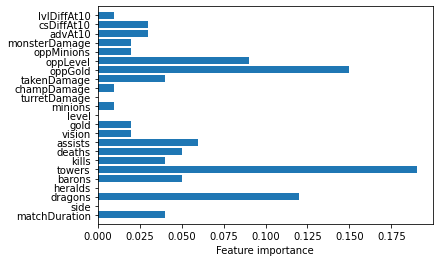

In [89]:
# Fit model with hyperparameters determined from before
abclf = AdaBoostClassifier(learning_rate=0.5, n_estimators=100)
abclf.fit(topTrainNorm, topTrainTargetNorm)

# Run predictions on training and test sets
abTopTrain = abclf.predict(topTrainNorm)
abTopTest = abclf.predict(topTestNorm)

# Checking for overfitting
print("-----------------------AdaBoost-----------------------")
print(metrics.classification_report(topTrainTargetNorm, abTopTrain))
print(metrics.classification_report(topTestTargetNorm, abTopTest))

topNorm = pd.concat([topTrainNorm, topTestNorm])
topNormTarget = pd.concat([topTrainTargetNorm, topTestTargetNorm])

# Rerun on full dataset
abclf.fit(topNorm, topNormTarget)
topAdaFeatures = abclf.feature_importances_

# Feature importance
plot_feature_importances(abclf.feature_importances_, df=topNorm)

-----------------------Log Reg-----------------------
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       504
        True       0.97      0.96      0.96       511

    accuracy                           0.96      1015
   macro avg       0.96      0.96      0.96      1015
weighted avg       0.96      0.96      0.96      1015



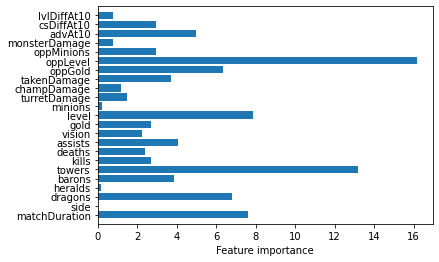

In [90]:
## Logistic Regression
logRegFinal.fit(topTrainNorm, topTrainTarget)
lrPredsFinal = logRegFinal.predict(topTestNorm)
print("-----------------------Log Reg-----------------------")
print(metrics.classification_report(topTestTarget, lrPredsFinal))

# Save feature importances
topLogFeatures = abs(logRegFinal.coef_[0])

# Feature importance
plot_feature_importances(abs(logRegFinal.coef_[0]), df=topNorm)

In [91]:
jngTrain, jngTrainTarget, jngTest, jngTestTarget = dfProcessor(jng)
jngTrainNorm, jngTrainTargetNorm, jngTestNorm, jngTestTargetNorm = dfProcessor(jng, norm=True)

-----------------------AdaBoost-----------------------
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1257
        True       0.97      0.97      0.97      1234

    accuracy                           0.97      2491
   macro avg       0.97      0.97      0.97      2491
weighted avg       0.97      0.97      0.97      2491

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       534
        True       0.96      0.96      0.96       534

    accuracy                           0.96      1068
   macro avg       0.96      0.96      0.96      1068
weighted avg       0.96      0.96      0.96      1068



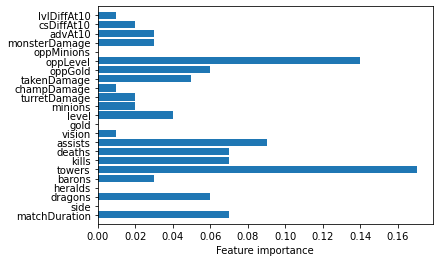

In [92]:
# Fit model with hyperparameters determined from before
abclf = AdaBoostClassifier(learning_rate=0.5, n_estimators=100)
abclf.fit(jngTrainNorm, jngTrainTargetNorm)

# Run predictions on training and test sets
abjngTrain = abclf.predict(jngTrainNorm)
abjngTest = abclf.predict(jngTestNorm)

# Checking for overfitting
print("-----------------------AdaBoost-----------------------")
print(metrics.classification_report(jngTrainTargetNorm, abjngTrain))
print(metrics.classification_report(jngTestTargetNorm, abjngTest))

jngNorm = pd.concat([jngTrainNorm, jngTestNorm])
jngNormTarget = pd.concat([jngTrainTargetNorm, jngTestTargetNorm])

# Rerun on full dataset
abclf.fit(jngNorm, jngNormTarget)
jngAdaFeatures = abclf.feature_importances_

# Feature importance
plot_feature_importances(abclf.feature_importances_, df=jngNorm)

-----------------------Log Reg-----------------------
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       534
        True       0.96      0.95      0.96       534

    accuracy                           0.96      1068
   macro avg       0.96      0.96      0.96      1068
weighted avg       0.96      0.96      0.96      1068



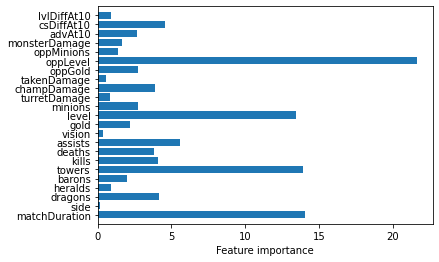

In [93]:
## Logistic Regression
logRegFinal.fit(jngTrainNorm, jngTrainTarget)
lrPredsFinal = logRegFinal.predict(jngTestNorm)
print("-----------------------Log Reg-----------------------")
print(metrics.classification_report(jngTestTarget, lrPredsFinal))

# Save feature importances
jngLogFeatures = abs(logRegFinal.coef_[0])

# Feature importance
plot_feature_importances(abs(logRegFinal.coef_[0]), df=jngNorm)

In [94]:
midTrain, midTrainTarget, midTest, midTestTarget = dfProcessor(mid)
midTrainNorm, midTrainTargetNorm, midTestNorm, midTestTargetNorm = dfProcessor(mid, norm=True)

-----------------------AdaBoost-----------------------
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      1151
        True       0.98      0.98      0.98      1194

    accuracy                           0.98      2345
   macro avg       0.98      0.98      0.98      2345
weighted avg       0.98      0.98      0.98      2345

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       494
        True       0.96      0.95      0.96       511

    accuracy                           0.96      1005
   macro avg       0.96      0.96      0.96      1005
weighted avg       0.96      0.96      0.96      1005



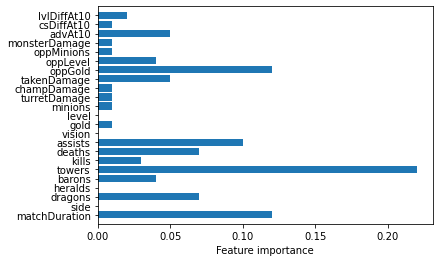

In [95]:
# Fit model with hyperparameters determined from before
abclf = AdaBoostClassifier(learning_rate=0.5, n_estimators=100)
abclf.fit(midTrainNorm, midTrainTargetNorm)

# Run predictions on training and test sets
abmidTrain = abclf.predict(midTrainNorm)
abmidTest = abclf.predict(midTestNorm)

# Checking for overfitting
print("-----------------------AdaBoost-----------------------")
print(metrics.classification_report(midTrainTargetNorm, abmidTrain))
print(metrics.classification_report(midTestTargetNorm, abmidTest))

midNorm = pd.concat([midTrainNorm, midTestNorm])
midNormTarget = pd.concat([midTrainTargetNorm, midTestTargetNorm])

# Rerun on full dataset
abclf.fit(midNorm, midNormTarget)
midAdaFeatures = abclf.feature_importances_

# Feature importance
plot_feature_importances(abclf.feature_importances_, df=midNorm)

-----------------------Log Reg-----------------------
              precision    recall  f1-score   support

       False       0.97      0.96      0.96       494
        True       0.96      0.97      0.96       511

    accuracy                           0.96      1005
   macro avg       0.96      0.96      0.96      1005
weighted avg       0.96      0.96      0.96      1005



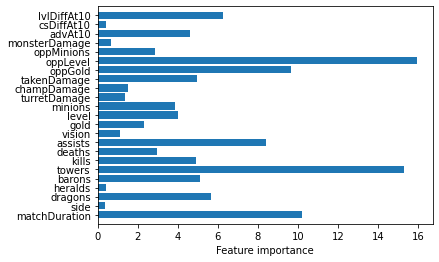

In [96]:
## Logistic Regression
logRegFinal.fit(midTrainNorm, midTrainTarget)
lrPredsFinal = logRegFinal.predict(midTestNorm)
print("-----------------------Log Reg-----------------------")
print(metrics.classification_report(midTestTarget, lrPredsFinal))

# Save feature importances
midLogFeatures = abs(logRegFinal.coef_[0])

# Feature importance
plot_feature_importances(abs(logRegFinal.coef_[0]), df=midNorm)

In [97]:
adcTrain, adcTrainTarget, adcTest, adcTestTarget = dfProcessor(adc)
adcTrainNorm, adcTrainTargetNorm, adcTestNorm, adcTestTargetNorm = dfProcessor(adc, norm=True)

-----------------------AdaBoost-----------------------
              precision    recall  f1-score   support

       False       0.98      0.97      0.97      1183
        True       0.97      0.98      0.97      1141

    accuracy                           0.97      2324
   macro avg       0.97      0.97      0.97      2324
weighted avg       0.97      0.97      0.97      2324

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       511
        True       0.94      0.95      0.95       485

    accuracy                           0.95       996
   macro avg       0.95      0.95      0.95       996
weighted avg       0.95      0.95      0.95       996



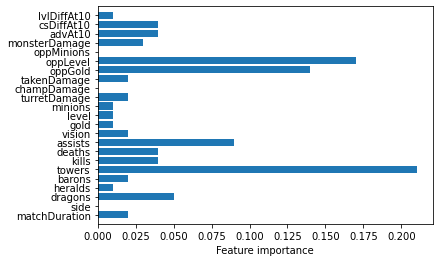

In [98]:
# Fit model with hyperparameters determined from before
abclf = AdaBoostClassifier(learning_rate=0.5, n_estimators=100)
abclf.fit(adcTrainNorm, adcTrainTargetNorm)

# Run predictions on training and test sets
abadcTrain = abclf.predict(adcTrainNorm)
abadcTest = abclf.predict(adcTestNorm)

# Checking for overfitting
print("-----------------------AdaBoost-----------------------")
print(metrics.classification_report(adcTrainTargetNorm, abadcTrain))
print(metrics.classification_report(adcTestTargetNorm, abadcTest))

adcNorm = pd.concat([adcTrainNorm, adcTestNorm])
adcNormTarget = pd.concat([adcTrainTargetNorm, adcTestTargetNorm])

# Rerun on full dataset
abclf.fit(adcNorm, adcNormTarget)
adcAdaFeatures = abclf.feature_importances_

# Feature importance
plot_feature_importances(abclf.feature_importances_, df=adcNorm)

-----------------------Log Reg-----------------------
              precision    recall  f1-score   support

       False       0.97      0.95      0.96       511
        True       0.95      0.96      0.96       485

    accuracy                           0.96       996
   macro avg       0.96      0.96      0.96       996
weighted avg       0.96      0.96      0.96       996



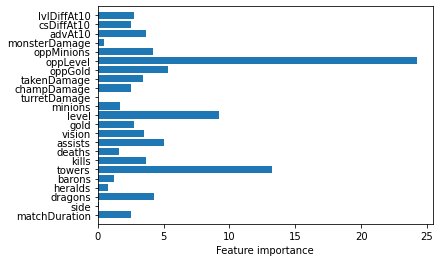

In [99]:
## Logistic Regression
logRegFinal.fit(adcTrainNorm, adcTrainTarget)
lrPredsFinal = logRegFinal.predict(adcTestNorm)
print("-----------------------Log Reg-----------------------")
print(metrics.classification_report(adcTestTarget, lrPredsFinal))

# Save feature importances
adcLogFeatures = abs(logRegFinal.coef_[0])

# Feature importance
plot_feature_importances(abs(logRegFinal.coef_[0]), df=adcNorm)

In [100]:
supTrain, supTrainTarget, supTest, supTestTarget = dfProcessor(sup)
supTrainNorm, supTrainTargetNorm, supTestNorm, supTestTargetNorm = dfProcessor(sup, norm=True)

-----------------------AdaBoost-----------------------
              precision    recall  f1-score   support

       False       0.99      0.97      0.98      1115
        True       0.97      0.99      0.98      1197

    accuracy                           0.98      2312
   macro avg       0.98      0.98      0.98      2312
weighted avg       0.98      0.98      0.98      2312

              precision    recall  f1-score   support

       False       0.97      0.96      0.96       502
        True       0.96      0.97      0.96       490

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992



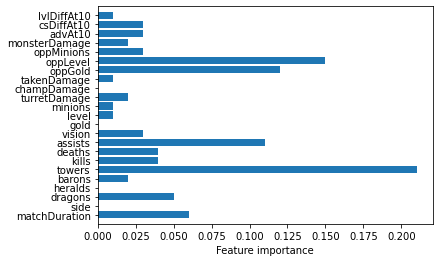

In [101]:
# Fit model with hyperparameters determined from before
abclf = AdaBoostClassifier(learning_rate=0.5, n_estimators=100)
abclf.fit(supTrainNorm, supTrainTargetNorm)

# Run predictions on training and test sets
absupTrain = abclf.predict(supTrainNorm)
absupTest = abclf.predict(supTestNorm)

# Checking for overfitting
print("-----------------------AdaBoost-----------------------")
print(metrics.classification_report(supTrainTargetNorm, absupTrain))
print(metrics.classification_report(supTestTargetNorm, absupTest))

supNorm = pd.concat([supTrainNorm, supTestNorm])
supNormTarget = pd.concat([supTrainTargetNorm, supTestTargetNorm])

# Rerun on full dataset
abclf.fit(supNorm, supNormTarget)
supAdaFeatures = abclf.feature_importances_

# Feature importance
plot_feature_importances(supAdaFeatures, df=supNorm)

-----------------------Log Reg-----------------------
              precision    recall  f1-score   support

       False       0.97      0.96      0.96       502
        True       0.96      0.97      0.96       490

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992



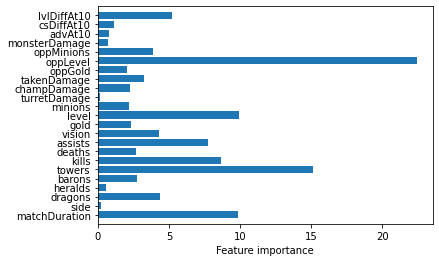

In [102]:
## Logistic Regression
logRegFinal.fit(supTrainNorm, supTrainTarget)
lrPredsFinal = logRegFinal.predict(supTestNorm)
print("-----------------------Log Reg-----------------------")
print(metrics.classification_report(supTestTarget, lrPredsFinal))

# Save feature importances
supLogFeatures = abs(logRegFinal.coef_[0])

# Feature importance
plot_feature_importances(supLogFeatures, df=supNorm)

In [137]:
roleAdaFeatures

,Top Lane,Jungle,Mid Lane,AD Carry,Support
matchDuration,0.04,0.07,0.12,0.02,0.06
side,0.00,0.00,0.00,0.00,0.00
dragons,0.12,0.06,0.07,0.05,0.05
heralds,0.00,0.00,0.00,0.01,0.00
barons,0.05,0.03,0.04,0.02,0.02
towers,0.19,0.17,0.22,0.21,0.21
kills,0.04,0.07,0.03,0.04,0.04
deaths,0.05,0.07,0.07,0.04,0.04
assists,0.06,0.09,0.10,0.09,0.11
vision,0.02,0.01,0.00,0.02,0.03


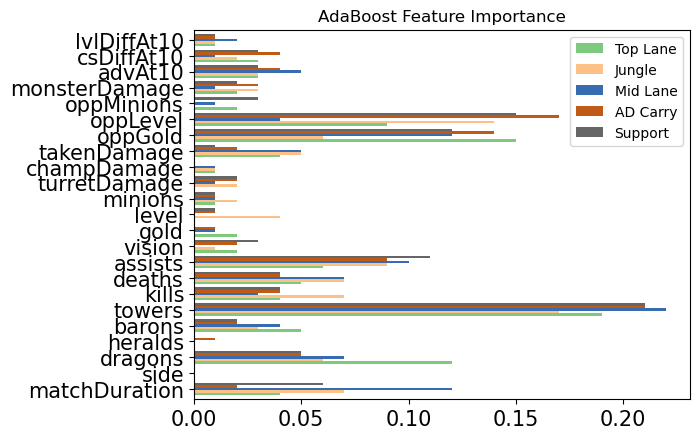

In [177]:
roleAdaFeatures.plot.barh(width=0.8, colormap='Accent', fontsize=15)
plt.title('AdaBoost Feature Importance')
plt.show()

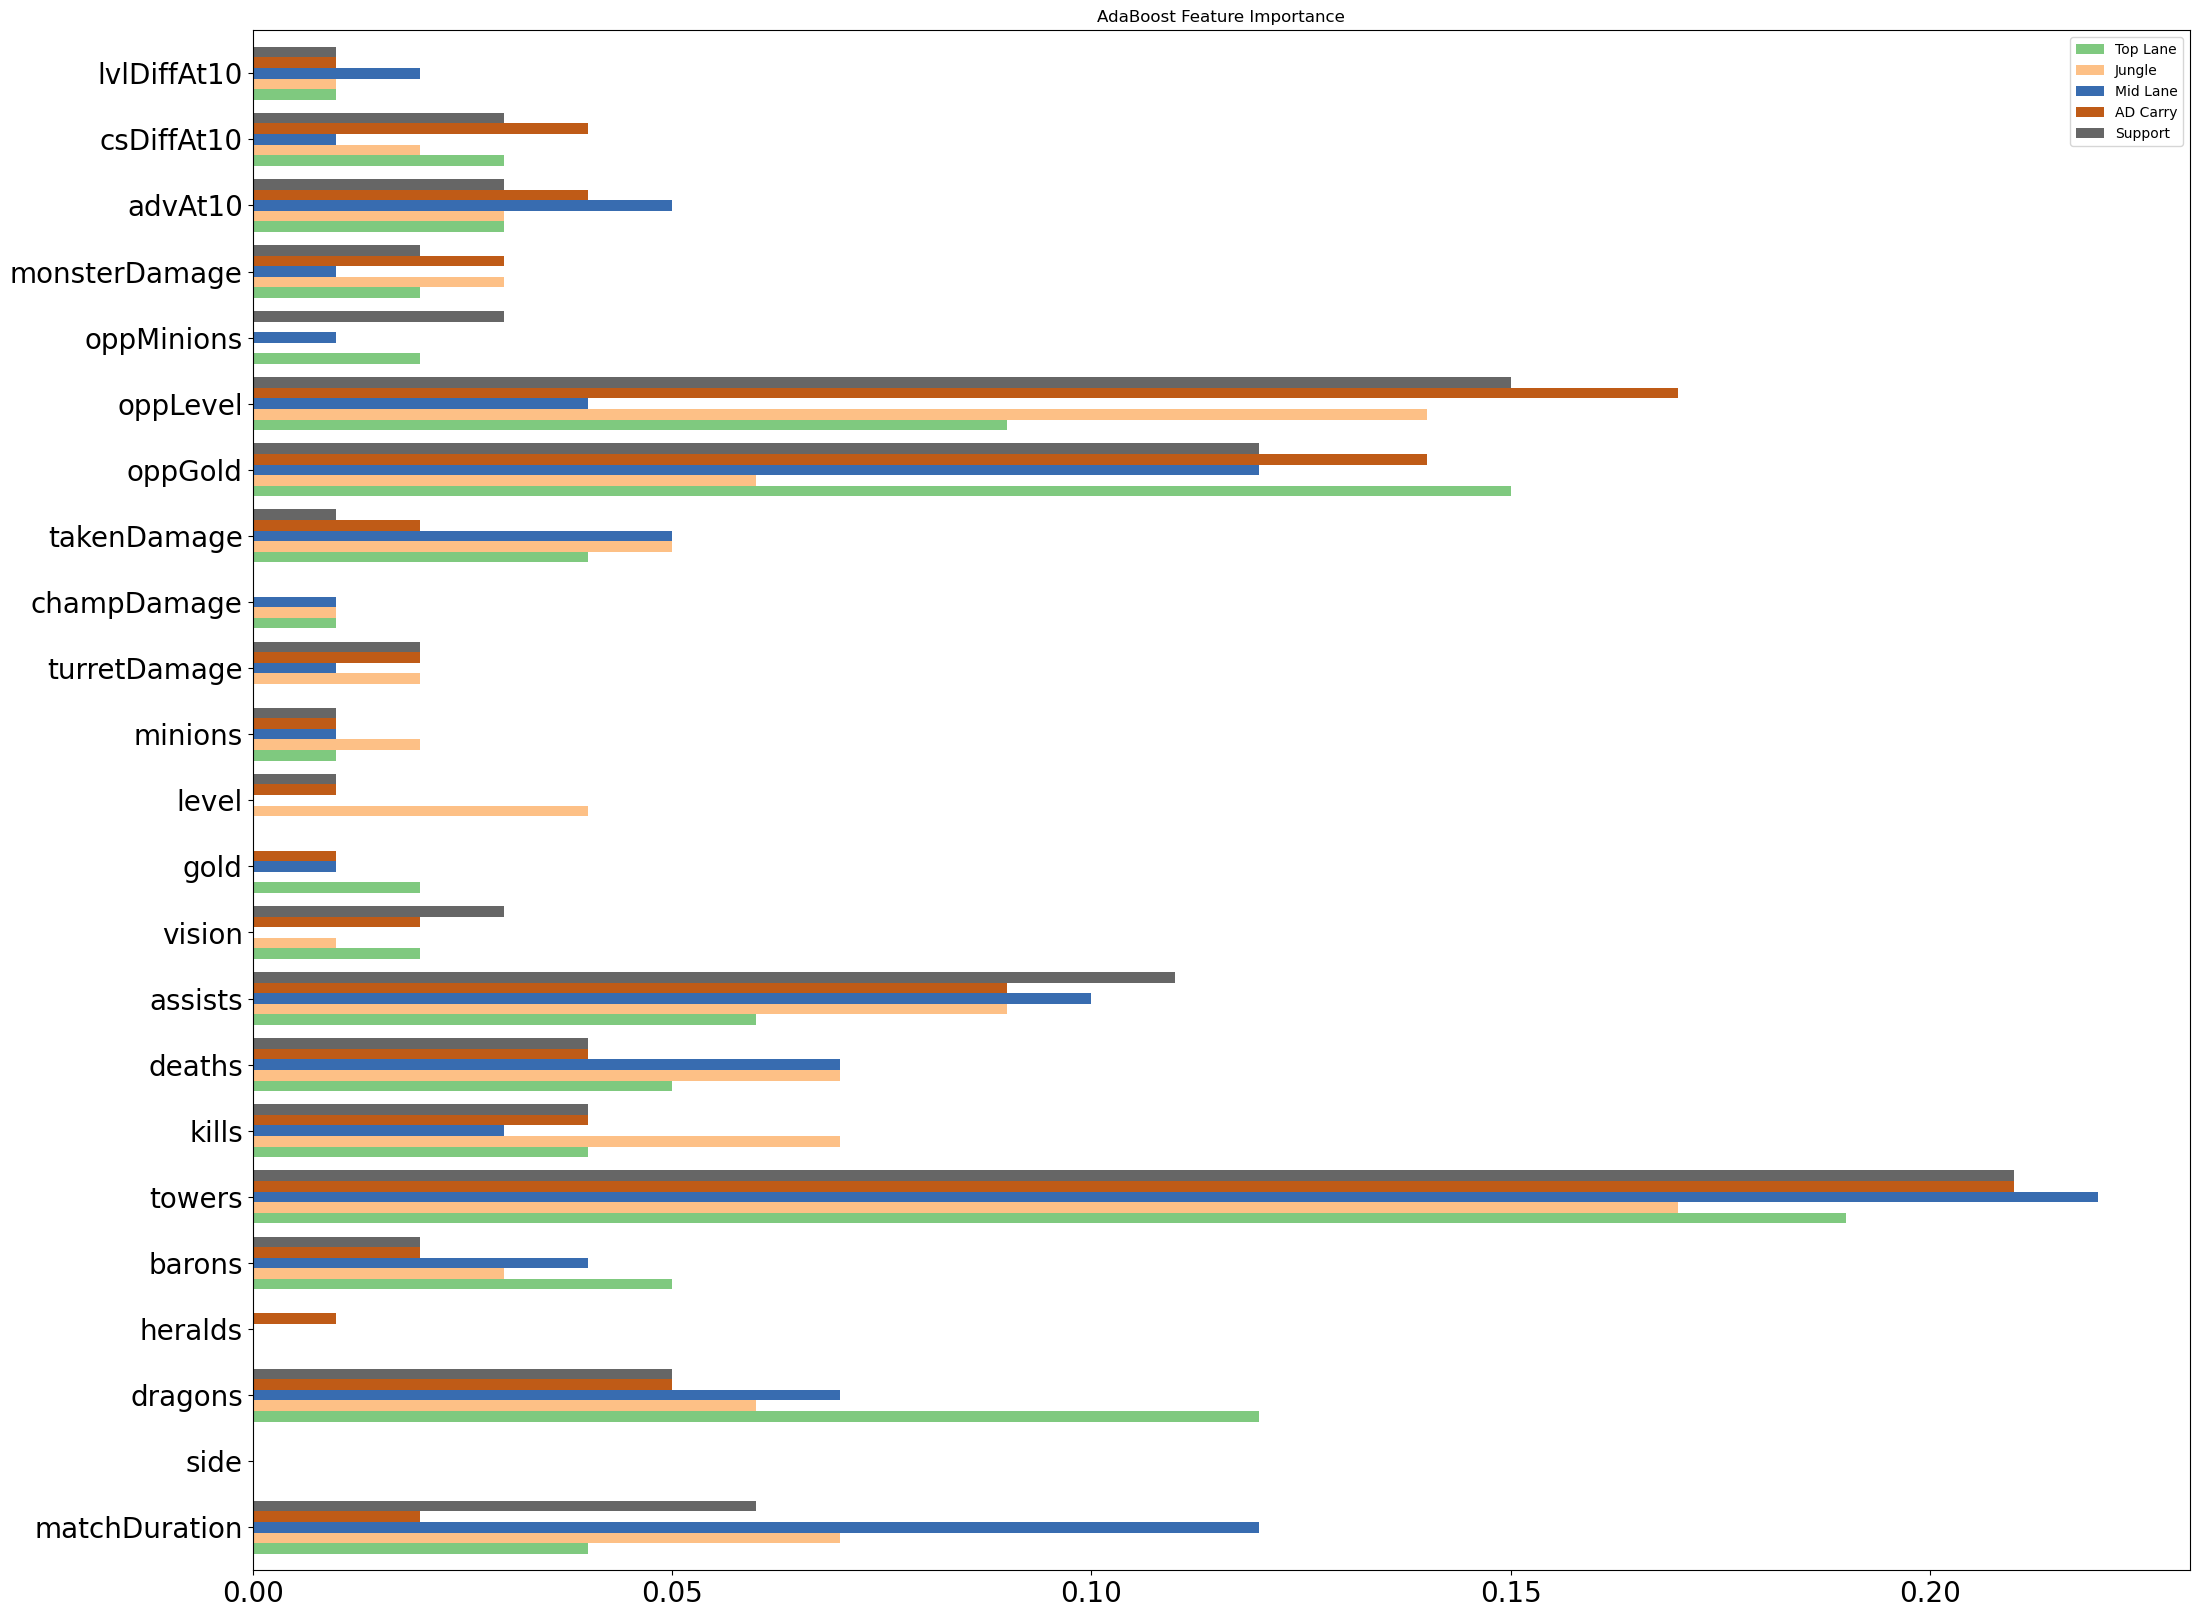

In [182]:
roleAdaFeatures=pd.DataFrame({
    'Top Lane' : topAdaFeatures,
    'Jungle' : jngAdaFeatures,
    'Mid Lane' : midAdaFeatures,
    'AD Carry' : adcAdaFeatures,
    'Support' : supAdaFeatures
}, index=sup.drop(columns=['win']).columns)

roleAdaFeatures.plot.barh(width=0.8, colormap='Accent', figsize=(25,20), fontsize=20)
plt.title('AdaBoost Feature Importance')
plt.show()

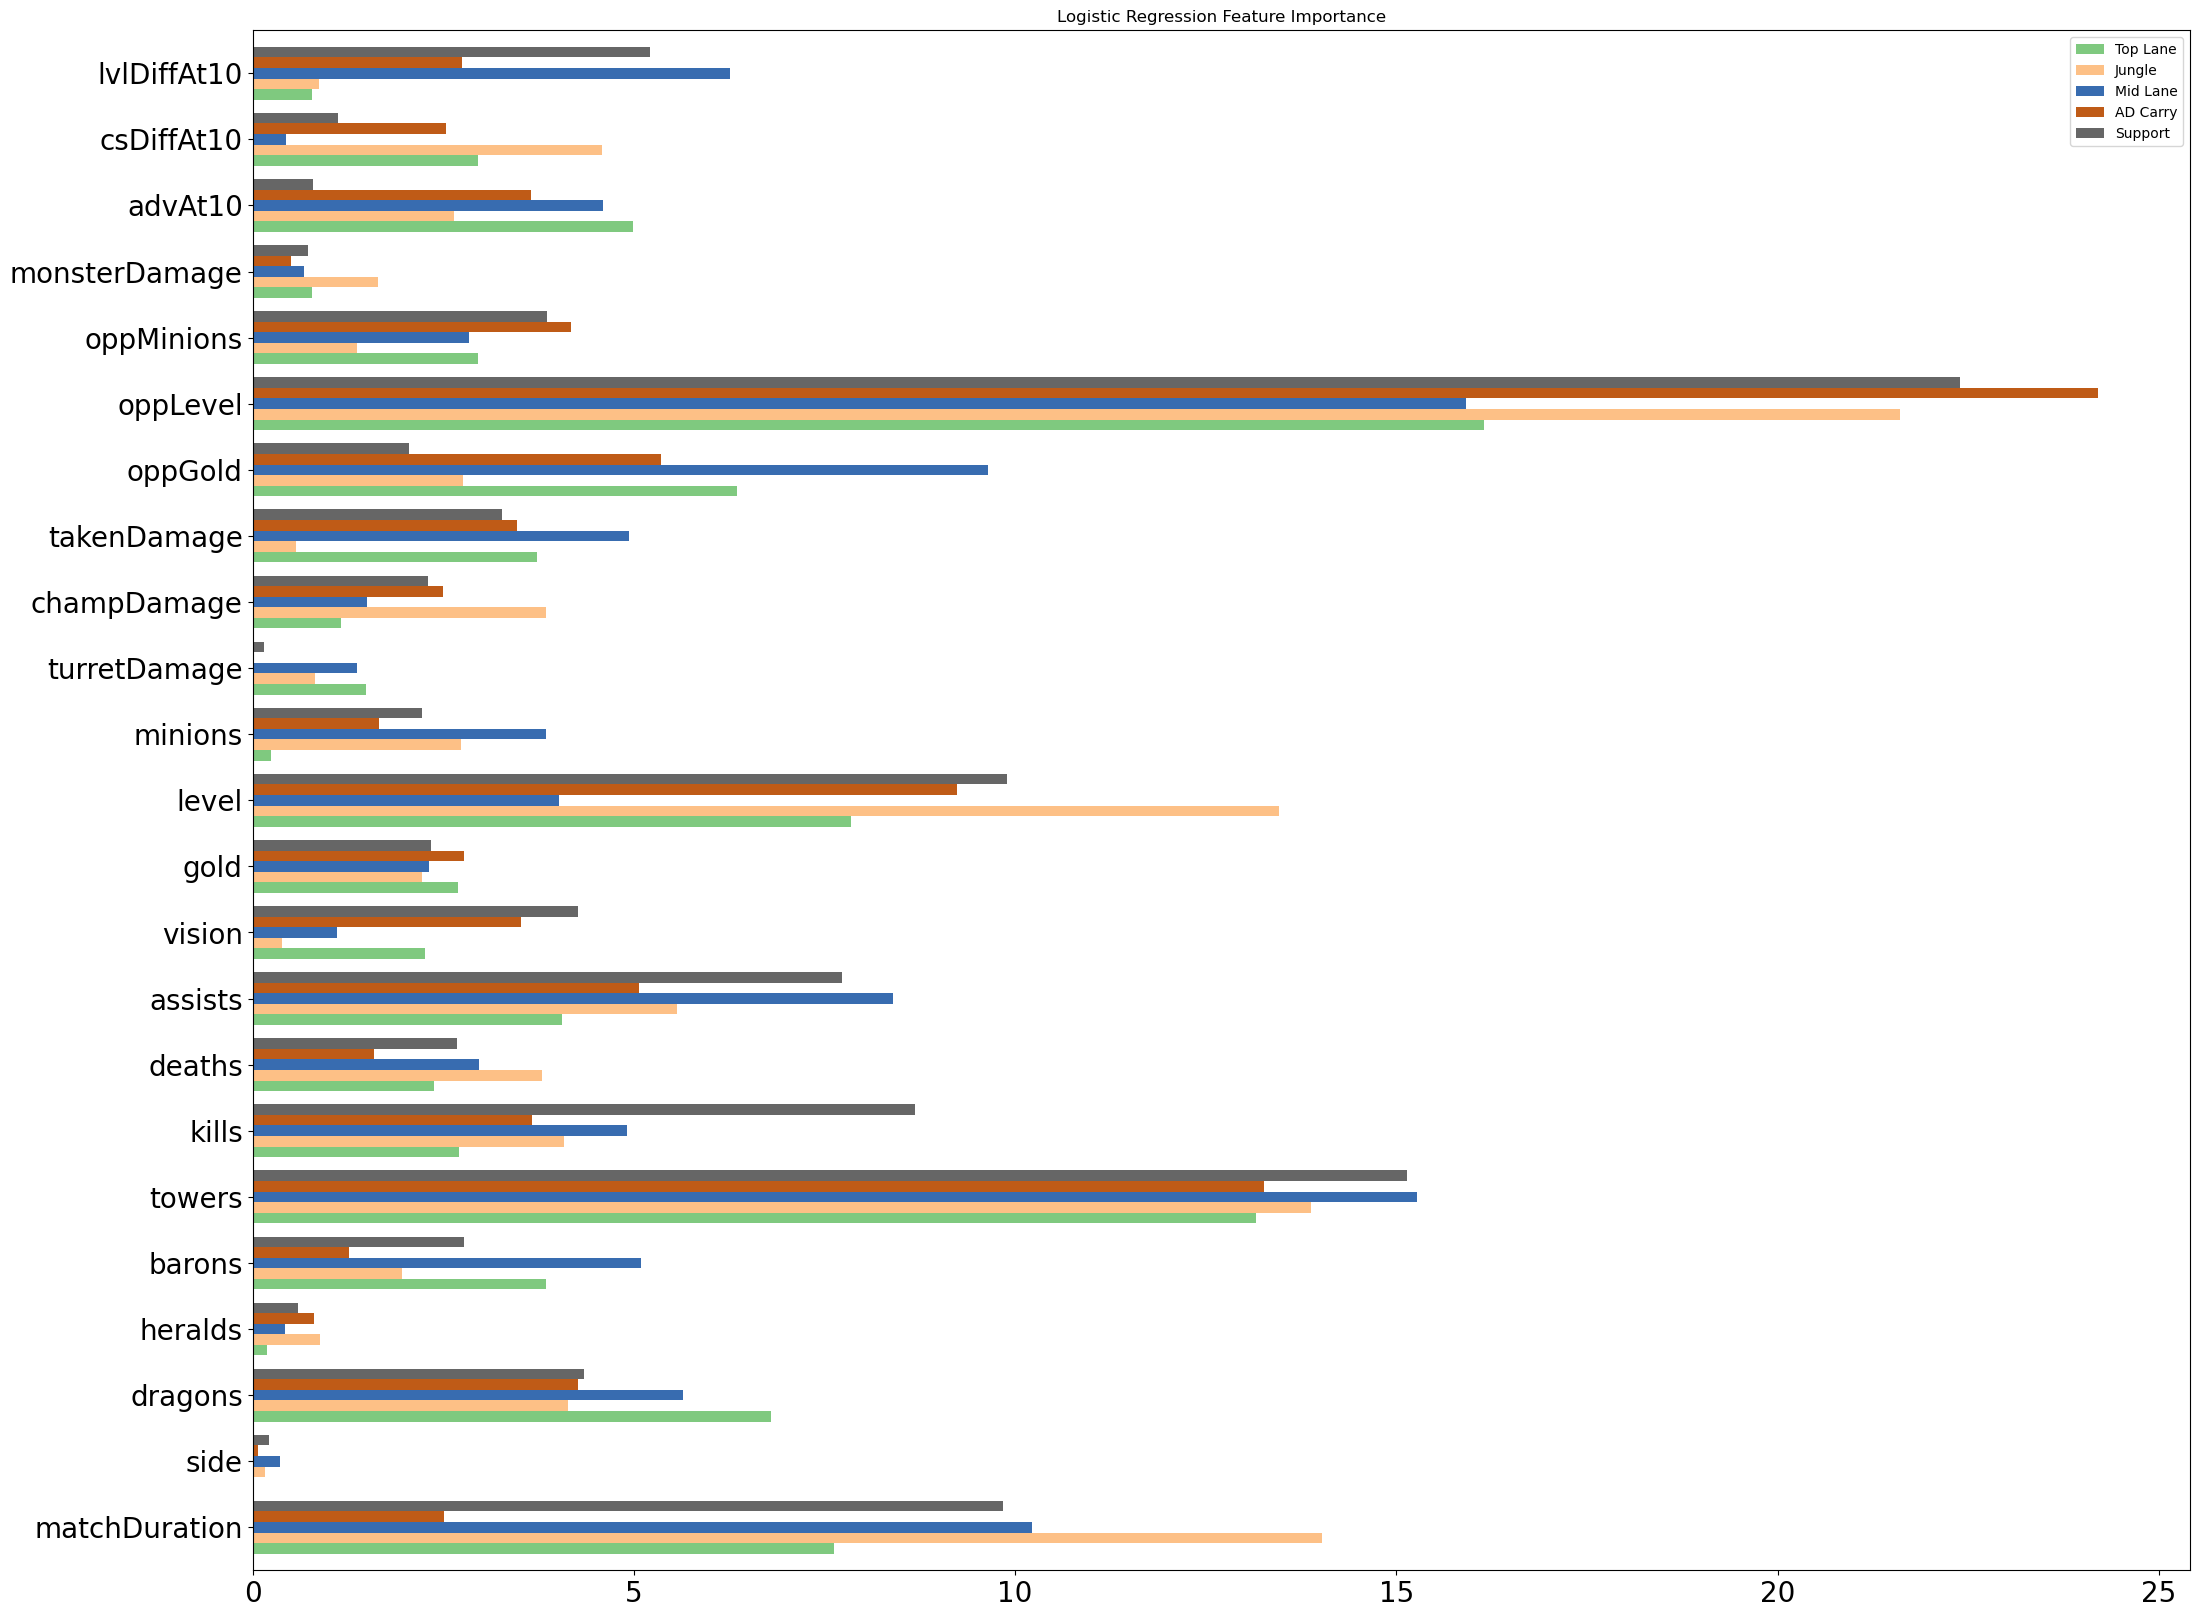

In [183]:
roleLogFeatures=pd.DataFrame({
    'Top Lane' : topLogFeatures,
    'Jungle' : jngLogFeatures,
    'Mid Lane' : midLogFeatures,
    'AD Carry' : adcLogFeatures,
    'Support' : supLogFeatures
}, index=sup.drop(columns=['win']).columns)

roleLogFeatures.plot.barh(width=0.8, colormap='Accent', figsize=(25,20), fontsize=20)
plt.title('Logistic Regression Feature Importance')
plt.show()